In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot
%matplotlib inline

# sns.set_style('ticks')

## Galaxy Phones Sold per Quarter (units sold)
Using sales data acquired from Samsungs public earnings calls, I will visualize the company's quarterly sales trends to support my analysis.

In [2]:
sold = pd.read_excel('./data/samsung_units_sold.xlsx', sheet_name='Data')

In [3]:
sold = sold.set_index('year_quarter', drop=True)
sold.head()

,units_shipped_mil
year_quarter,
2010-01-01,2.4
2010-04-01,3.6
2010-07-01,7.3
2010-10-01,9.6
2011-01-01,11.5


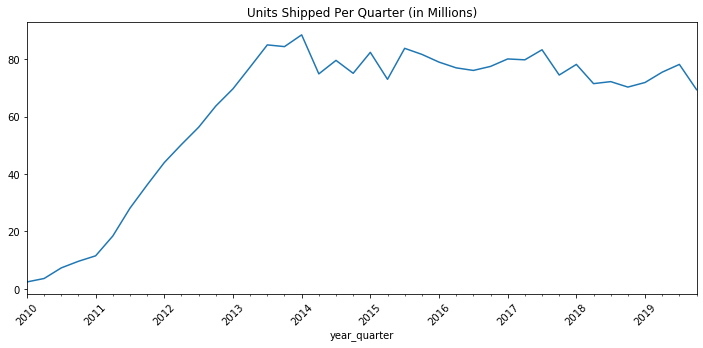

In [4]:
plt.figure(figsize=(12, 5))
sold.units_shipped_mil.plot()
plt.xticks(rotation=45)
plt.title('Units Shipped Per Quarter (in Millions)');

In [9]:
# calculate rolling average
sold['rolling_avg'] = sold['units_shipped_mil'].rolling(2, center=True).mean()
sold.head()

,units_shipped_mil,rolling_avg
year_quarter,,
2010-01-01,2.4,NaN
2010-04-01,3.6,3.00
2010-07-01,7.3,5.45
2010-10-01,9.6,8.45
2011-01-01,11.5,10.55


In [15]:
# plot quarterly units sold + moving average
fig = px.bar(sold.reset_index(level=0), x="year_quarter", y="units_shipped_mil")
fig.update_layout({
    'paper_bgcolor': 'rgba(0,0,0,0)'
},
    title={
        'text': "Samsung Galaxy Phones - Units Shipped Per Quarter",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    )
fig.add_annotation(
            x='2014-01-01',
            y=88.5,
            text="88.5M")
fig.add_annotation(
            x='2019-01-01',
            y=71.9,
            text="71.9M")
fig.update_xaxes(title_text='Year & Quarter')
fig.update_yaxes(title_text='Units Shipped (in Millions)')
fig.write_image("./images/plots/units_shipped.png")
fig.show()

## Phones % of Earnings - Q1 2019
Q1 is when their phone event occurs every year. I will view the distribution of earnings per division for Q1 of 2019 as well as quarterly trends over the last 6 years.

In [6]:
labels = ['Consumer Electronics', 'Mobile', 'Device Solutions']
profits = [10.04, 27.20, 20.62]
profits_df = pd.DataFrame(zip(labels, profits), columns=['division', 'profit'])
profits_df.head()

,division,profit
0,Consumer Electronics,10.04
1,Mobile,27.20
2,Device Solutions,20.62


In [7]:
fig = px.pie(profits_df, values='profit', names='division')
fig.update_layout({
    'paper_bgcolor': 'rgba(0,0,0,0)',
    'plot_bgcolor': 'rgba(0,0,0,0)'
},
    title={
        'text': "Percent of Profits - Q1 2019",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    )

fig.update_traces(textposition='inside', textfont_size=14)
fig.write_image("./images/plots/profits_pie.png")
fig.show()